
___(End-t-end) ML Pipeline: Network anomaly detection (Classification Task)___

Steps of ML pipeline implementation (in general):

1) Problem Statement (Definition)<br>

2) Import Libraries and Packges<br>

3) Data Exploration --> Loading the dataset, split dataset into train-test sets <br>
                        (do not touch test set before the evaluation), analysis of the target, <br>
                        analysis of the features: numerical or categorical, features correlation,<br>
                        check if we have outliers or null data)<br>

4) Data Preprocessing --> replacing missing values<br>
                        
5) Feature Engineering --> one-hot-encoding, standard scaling, resampling, PCA<br>
                           get dummies is working on the whole dataset (do not use it) <br>
                           we should fit one-hot-encoding on the training set then transform
                           it on the test set <br>
                           Using column transformer for using all ordinal and one hot encoder features<br>

6) Model selection, model training and hyperparameter tuning<br>

7) Model assessment (model evaluation) <br>

8) Findings & Recommendations <br>


__Problem definition__

With the enormous increase of computer networks usage and its applications, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect __anomalies__ and __attacks__ in the network, is becoming more important. 

In [32]:
# Import the libraries and packeges

import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import tree, metrics, svm
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from pprint import pprint
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


__Data Exploration__

This data is KDDCUP’99 data set, which is widely used as one of the few publicly available data sets
for network-based anomaly detection systems.

In [33]:
#Parsing the dataset

# readinag given text files, convert them to csv files and creating dataframes
df_train = pd.read_csv('Train.txt', header = None)
df_test = pd.read_csv('Test.txt', header = None)
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [34]:
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [35]:
# adding column headings
df_train.columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment",
              "urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted",
              "numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
              "isguestlogin","count","srvcount","serrorrate", "srvserrorrate","rerrorrate","srvrerrorrate",
              "samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", 
              "dsthostdiffsrvrate","dsthostsamesrcportrate", "dsthostsrvdiffhostrate","dsthostserrorrate",
              "dsthostsrvserrorrate","dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

df_test.columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment",
              "urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted",
              "numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
              "isguestlogin","count","srvcount","serrorrate", "srvserrorrate","rerrorrate","srvrerrorrate",
              "samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", 
              "dsthostdiffsrvrate","dsthostsamesrcportrate", "dsthostsrvdiffhostrate","dsthostserrorrate",
              "dsthostsrvserrorrate","dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

# storing this dataframe in a csv file
df_train.to_csv('Train.csv', index=None)
df_test.to_csv('Test.csv', index=None)

df_train.head(5)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Based on the data provided and the use case, this will be a supervised machine learning classification 
problem because the data set is labelled, and the target variable is categorized.

In [36]:
df_test.head(5)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [37]:
# Summary Statistics: check the min, max values of features
df_train.describe(include='all')

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973,125973.000000
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,102689,40338,74945,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67343,NaN
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN,19.504060
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN,2.291503
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,20.000000
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN,21.000000


In [38]:
#Checking Data Types and Missing Values, Data imputing may be necessary if there are missing values.
df_train.info()
#the dataset has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

__Data Preprocessing__

In [39]:
# Check if all values are zero in column 'numoutboundcmds'
if (df_train['numoutboundcmds'] == 0).all():
    print("All values in the column 'numoutboundcmds' are Zero")
else:
    print("All values in the column 'numoutboundcmds' are not Zero")

All values in the column 'numoutboundcmds' are Zero


In [40]:
# And we can see 'land', 'urgent', 'numfailedlogins' have mostly zero values so we can drop these columns.
train_data = df_train.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1)
test_data = df_test.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1)



As we are focussing on binary classification for this dataset, we can make all other classes other than normal as 'attack'. So the target is the 'attack' column.


In [41]:
train_data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [42]:
train_data.loc[train_data['attack'] !='normal', ['attack']] = 'attack'
test_data.loc[test_data['attack'] !='normal', ['attack']] = 'attack'
train_data['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [43]:
train_data['protocoltype'].unique()


array(['tcp', 'udp', 'icmp'], dtype=object)

In [44]:
train_data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [45]:
train_data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [46]:
train_data.head(10)

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,attack,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,attack,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,attack,21


__Feature Engineering__


__One hot encoding__

In [47]:
le=LabelEncoder()

train_data['protocoltype']=le.fit_transform(train_data['protocoltype'])
train_data['service']=le.fit_transform(train_data['service'])
train_data['flag']=le.fit_transform(train_data['flag'])
train_data['attack']=le.fit_transform(train_data['attack'])


test_data['protocoltype']=le.fit_transform(test_data['protocoltype'])
test_data['service']=le.fit_transform(test_data['service'])
test_data['flag']=le.fit_transform(test_data['flag'])
test_data['attack']=le.fit_transform(test_data['attack'])

train_data

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
3,0,1,24,9,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
4,0,1,24,9,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,21
125970,0,1,54,9,2231,384,0,0,1,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,20


In [48]:
test_data

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,1,45,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0,21
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0,21
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1,21
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0,15
4,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,1,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1,21
22540,0,1,22,9,317,938,0,0,1,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1,21
22541,0,1,22,9,54540,8314,0,2,1,1,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0,15
22542,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1,21


<AxesSubplot:>

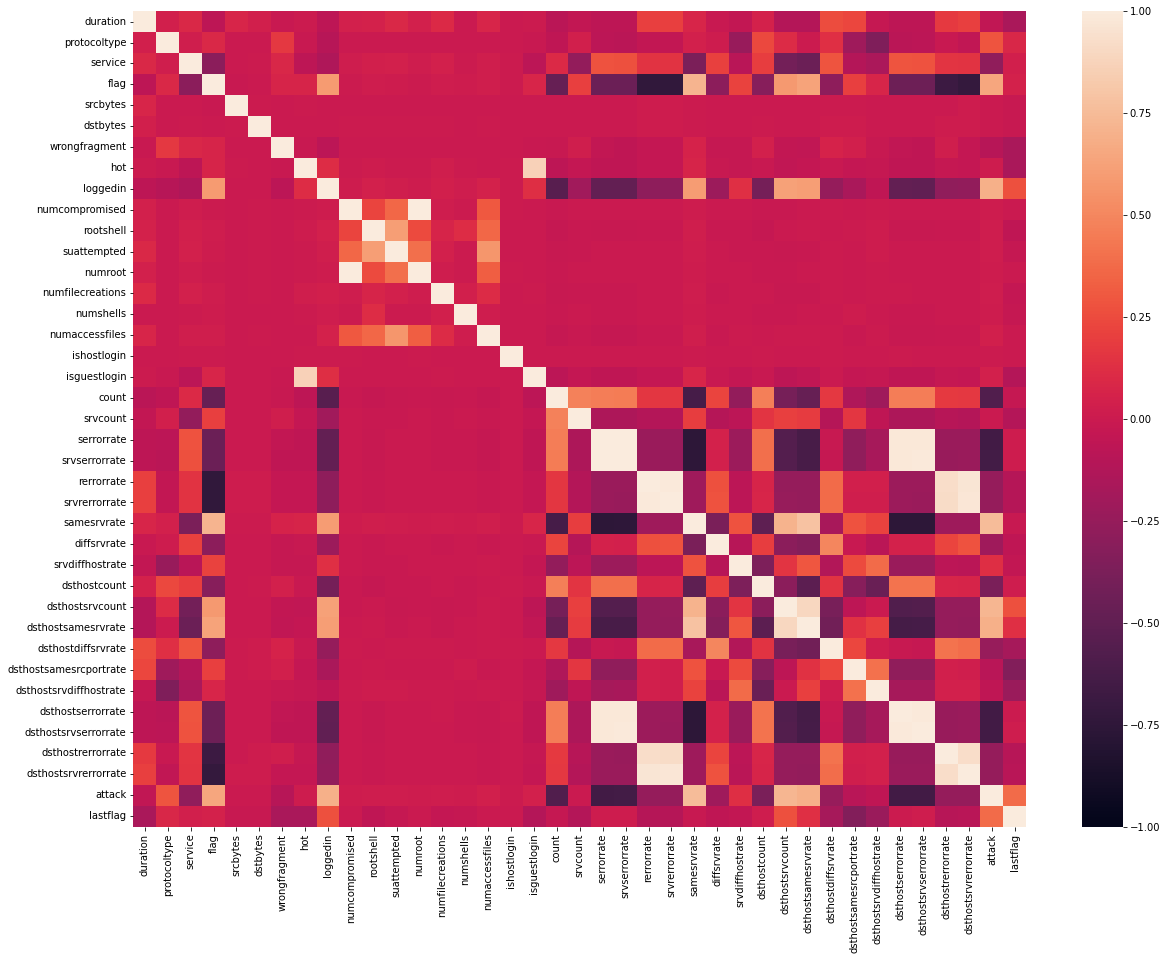

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), fmt='.0%', vmin=-1, vmax=1)



__Splitting the Features and Target Labels__

In [50]:
train_x_raw = train_data.drop(["attack"], axis = 1)
train_y = train_data["attack"]
print("train_features:", train_x_raw.shape)
print("train_target:", train_y.shape)

test_x_raw = test_data.drop(["attack"], axis = 1)
test_y = test_data["attack"]
print("test_features:", test_x_raw.shape)
print("test_target:", test_y.shape)


train_features: (125973, 38)
train_target: (125973,)
test_features: (22544, 38)
test_target: (22544,)


__Checking data imbalance__

/home/nazila/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


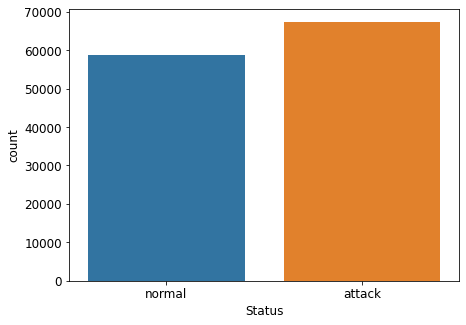

In [51]:
# Create boxplot to check if the dataset is balanced or unbalenced 

plt.figure(figsize = (7,5))
ax = sns.countplot(train_y)
plt.xticks(size = 12)
ax.set_xticklabels(['normal', 'attack'])
plt.xlabel('Status', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
plt.show()

__Standardization__

In [52]:
scaler = StandardScaler()
scaler.fit(train_x_raw)
train_x = scaler.transform(train_x_raw)

test_x = scaler.transform(test_x_raw)


__PCA__

In [53]:
'''
pca = PCA(n_components=20)
 
pca_train_features = pca.fit_transform(x_train_scaled)

pca_test_features = pca.transform(x_test_scaled)
 
print('Shape before PCA: ', x_train_scaled.shape)
print('Shape after PCA: ', pca_train_features.shape)
 
train_x = pd.DataFrame(data=pca_train_features)
test_x = pd.DataFrame(data=pca_test_features)
'''

"\npca = PCA(n_components=20)\n \npca_train_features = pca.fit_transform(x_train_scaled)\n\npca_test_features = pca.transform(x_test_scaled)\n \nprint('Shape before PCA: ', x_train_scaled.shape)\nprint('Shape after PCA: ', pca_train_features.shape)\n \ntrain_x = pd.DataFrame(data=pca_train_features)\ntest_x = pd.DataFrame(data=pca_test_features)\n"

__Model Training__

In [54]:
# Decision Tree

parameters_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
tree_model = GridSearchCV(estimator=tree_clas, param_grid=parameters_grid, cv=5, verbose=True)
tree_model.fit(train_x, train_y)
print("Best Decision Tree Classifier accuracy = {:.2f}".format(tree_model.best_score_))
print("Most Decision Tree classifier hyperparameter = {}".format(tree_model.best_params_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Decision Tree Classifier accuracy = 0.99
Most Decision Tree classifier hyperparameter = {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}


In [55]:
# Random Forest
parameters_grid = {"criterion" : ["gini", "entropy"],
                   "n_estimators" : range(50, 260, 50),
}
ran_forest = GridSearchCV(RandomForestClassifier(),parameters_grid, scoring ="accuracy", cv = 5, n_jobs = 1)
ran_forest.fit(train_x, train_y)
print("Best Random Forest Classifier accuracy = {:.2f}".format(ran_forest.best_score_))
print("Most useful random forest classifier hyperparameter = {}".format(ran_forest.best_params_))


Best Random Forest Classifier accuracy = 1.00
Most useful random forest classifier hyperparameter = {'criterion': 'gini', 'n_estimators': 200}


In [56]:
# Perceptron model
parameters_grid = {"loss" : ["log_loss", "hinge"],
                   "max_iter" : [1000, 2000, 3000],
                   "tol" : [None, 0.0001, 0.001, 0.01],
                   "n_iter_no_change" : [1, 5, 10]
}
percept_mod = RandomizedSearchCV(SGDClassifier(),parameters_grid, n_iter = 10,
scoring = "accuracy",cv = 5, n_jobs = 1)
percept_mod.fit(train_x, train_y)
print("Best Accuracy of Perceptron model = {:.2f}".format(percept_mod.best_score_))
print("Best found hyperparameter of Perceptron Classifier = {}".format(percept_mod.best_params_))

Best Accuracy of Perceptron model = 0.98
Best found hyperparameter of Perceptron Classifier = {'tol': None, 'n_iter_no_change': 1, 'max_iter': 2000, 'loss': 'hinge'}


__Model Evaluation__

In [57]:
#Evaluating Decision Tree model
y_decitree = tree_model.predict(test_x)
decitree_accuracy = accuracy_score(test_y, y_decitree)
con_matrix_rf = confusion_matrix(test_y, y_decitree)
precision, recall, f1, support = precision_recall_fscore_support(test_y, y_decitree)
print("Best_Accuracy =", decitree_accuracy)
print("Best Precision Check =", precision)
print("Best Recall Score =", recall)
print("Best F1-Score =", f1)
print("Display Confusion Matrix:\n", con_matrix_rf)

Best_Accuracy = 0.882097232079489
Best Precision Check = [0.96431505 0.8043497 ]
Best Recall Score = [0.82334606 0.95973638]
Best F1-Score = [0.88827238 0.87519955]
Display Confusion Matrix:
 [[10566  2267]
 [  391  9320]]


In [58]:
#Evaluating Random Forest model
y_ranfor = ran_forest.predict(test_x)
ranfor_accuracy = accuracy_score(test_y, y_ranfor)
con_matrix_rf = confusion_matrix(test_y, y_ranfor)
precision, recall, f1, support = precision_recall_fscore_support(test_y, y_ranfor)
print("Best_Accuracy =", ranfor_accuracy)
print("Best Precision Check =", precision)
print("Best Recall Score =", recall)
print("Best F1-Score =", f1)
print("Display Confusion Matrix:\n", con_matrix_rf)

Best_Accuracy = 0.8273154719659332
Best Precision Check = [0.97171802 0.72260484]
Best Recall Score = [0.71752513 0.97240243]
Best F1-Score = [0.82549644 0.82909698]
Display Confusion Matrix:
 [[9208 3625]
 [ 268 9443]]


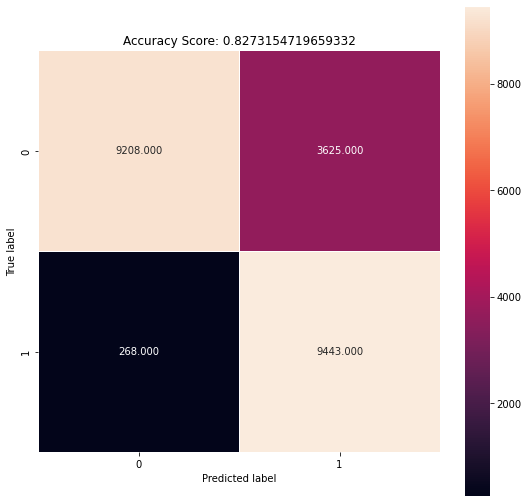

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix_rf, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ranfor_accuracy)
plt.title(all_sample_title, size = 12);

In [60]:
# Evaluating Perceptron model
y_perceptron = percept_mod.predict(test_x)
perceptron_accuracy = accuracy_score(test_y, y_perceptron)
con_matrix_3 = confusion_matrix(test_y, y_perceptron)
precision, recall, f1, support = precision_recall_fscore_support(test_y, y_perceptron)
print("Best Accuracy =", perceptron_accuracy)
print("Best Precision Check =", precision)
print("Best Recall Score =", recall)
print("Best F1-Score =", f1)
print("Display Confusion Matrix:\n", con_matrix_3)

Best Accuracy = 0.850026614620298
Best Precision Check = [0.92684249 0.77588912]
Best Recall Score = [0.79965713 0.91658943]
Best F1-Score = [0.85856515 0.84039088]
Display Confusion Matrix:
 [[10262  2571]
 [  810  8901]]


In [61]:
# Creating a model comparison table
data = {
'Models' : ['Decision Tree:','Random Forest:','Perceptron Model:'],
'Accuracy' : [decitree_accuracy,
ranfor_accuracy,
perceptron_accuracy],
}
model_comparison = pd.DataFrame(data)
model_comparison

,Models,Accuracy
0,Decision Tree:,0.882097
1,Random Forest:,0.827315
2,Perceptron Model:,0.850027
